<div style="text-align: center;">

# NMC-LCO 18650 Battery Lifespan Analysis


### Introduction

##### The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C. The goal of this notebook is to use Python machine learning & data analysis of these techniques to predict both the lifespan & remaining usable lifespan (RUL) on a single charge of these lithium ion batteries over time/cycles of use. The batteries are a hybrid of Nickel, Manganese, & Cobalt as well as Lithium Cobalt Oxide. Larger versions of these batteries are used in long-range models of various electric vehicles today. Credit for the data goes to Kaggle for making the Battery_RUL.csv & its auxillary datasets available online.

In [2004]:
import pandas as pd

# CSV file capture
file_path = 'Battery_RUL.csv'

# Import into a Pandas DataFrame
df = pd.read_csv(file_path)

separator = pd.DataFrame(['...'], columns=['Separator'])

# first & last 5 rows displayed; adjust via discretion
display(df.head(5))
print('...')
display(df.tail(5))
#display

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2                    6762.02           10420.38  1110  
3                    6762.02           10322.81  1109  
4                   53213.54           56699.65  1107

...


Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
15059       1108.0              770.44              179.523810   
15060       1109.0              771.12              179.523810   
15061       1110.0              769.12              179.357143   
15062       1111.0              773.88              162.374667   
15063       1112.0           677537.27           142740.640000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
15059                      3.773                    3.742            922.775   
15060                      3.773                    3.744            915.512   
15061                      3.773                    3.742            915.513   
15062                      3.763                    3.839            539.375   
15063                      4.206                    3.305          49680.004   

       Time constant current (s)  Charging time (s)  RUL  
15059                    1412.38            6678.88    4  
15060                    1412.31            6670.38    3  
15061                    1412.31            6637.12    2  
15062                    1148.00            7660.62    1  
15063                  599830.14          599830.14    0

### Importing Necessary Libraries, Functions, & APIs

In [1716]:
#TensorFlow & Keras API for lifespan predic. -> import necessary functions/lib.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression


import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input

### Relationships between Measured Variables & RUL

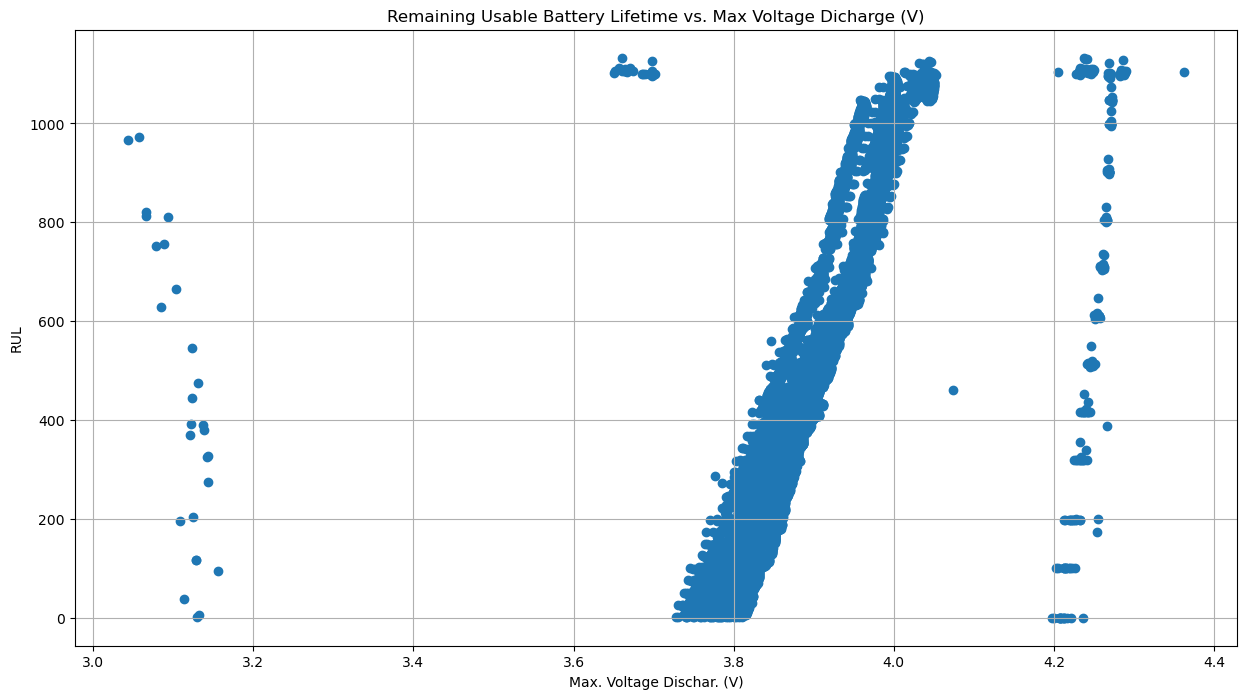

In [86]:
df = pd.read_csv(file_path)

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Max. Voltage Dischar. (V)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Max Voltage Dicharge (V)')
plt.ylabel('RUL')
plt.xlabel('Max. Voltage Dischar. (V)')
plt.grid(True)
plt.show()

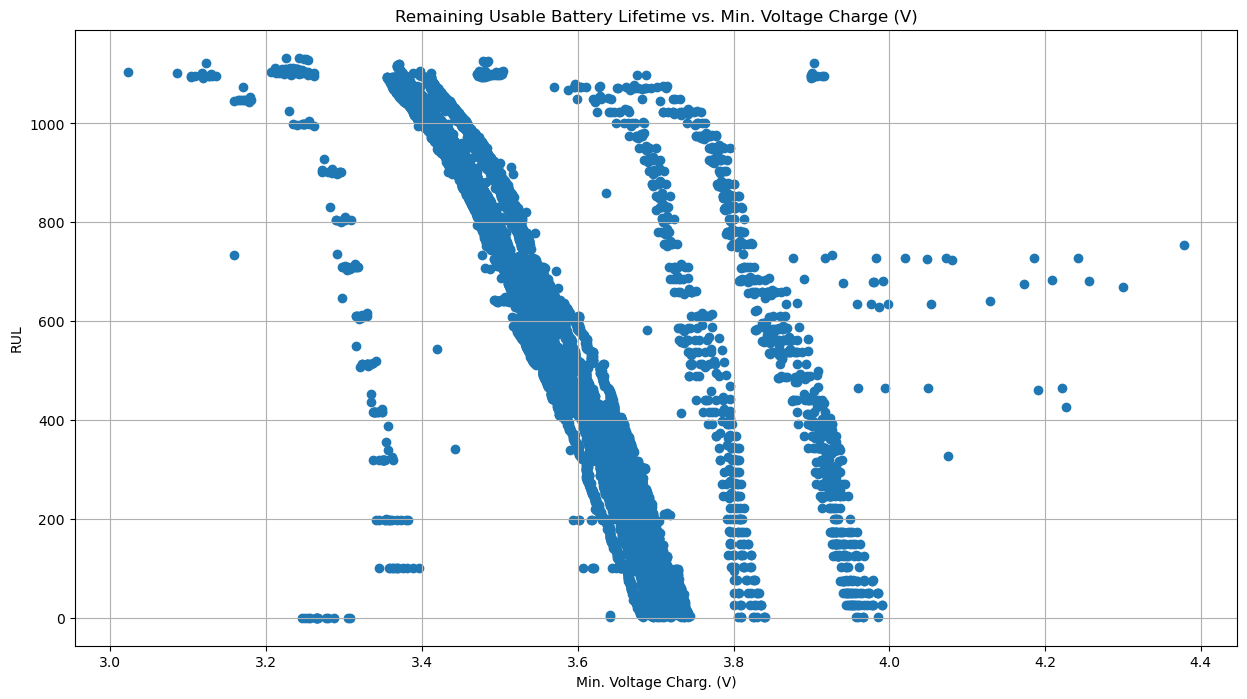

In [88]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Min. Voltage Charg. (V)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Min. Voltage Charge (V)')
plt.ylabel('RUL')
plt.xlabel('Min. Voltage Charg. (V)')
plt.grid(True)
plt.show()

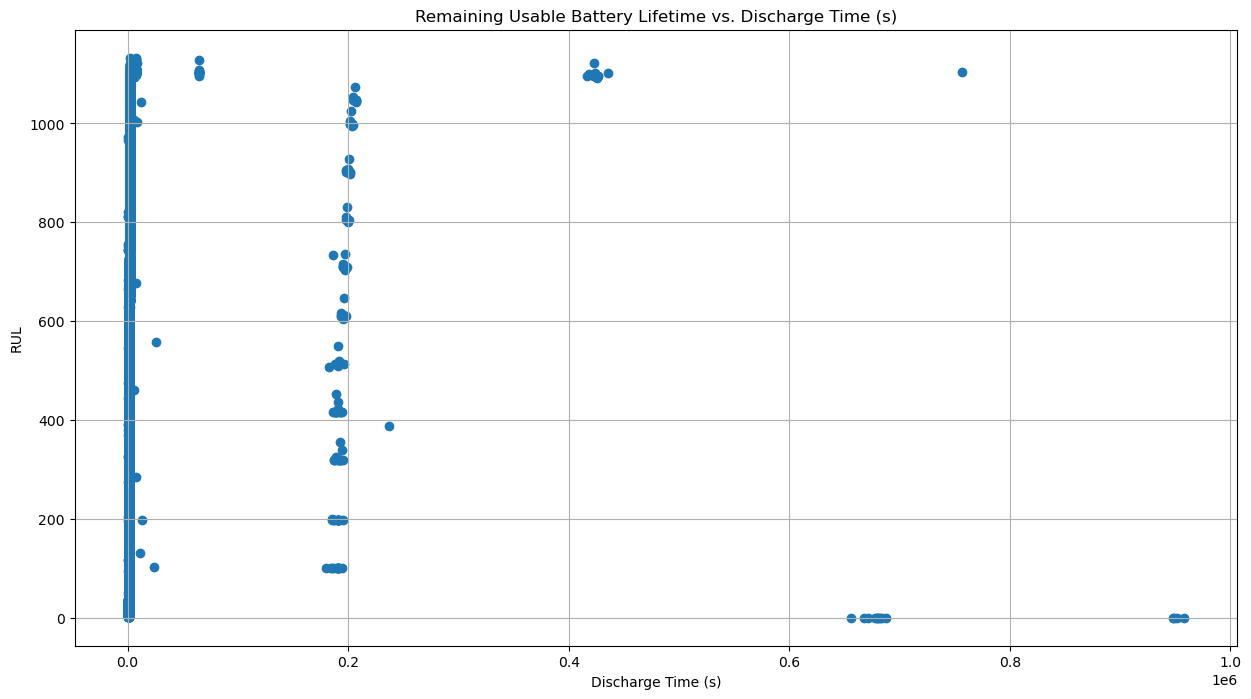

In [92]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Discharge Time (s)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Discharge Time (s)')
plt.ylabel('RUL')
plt.xlabel('Discharge Time (s)')
plt.grid(True)
plt.show()

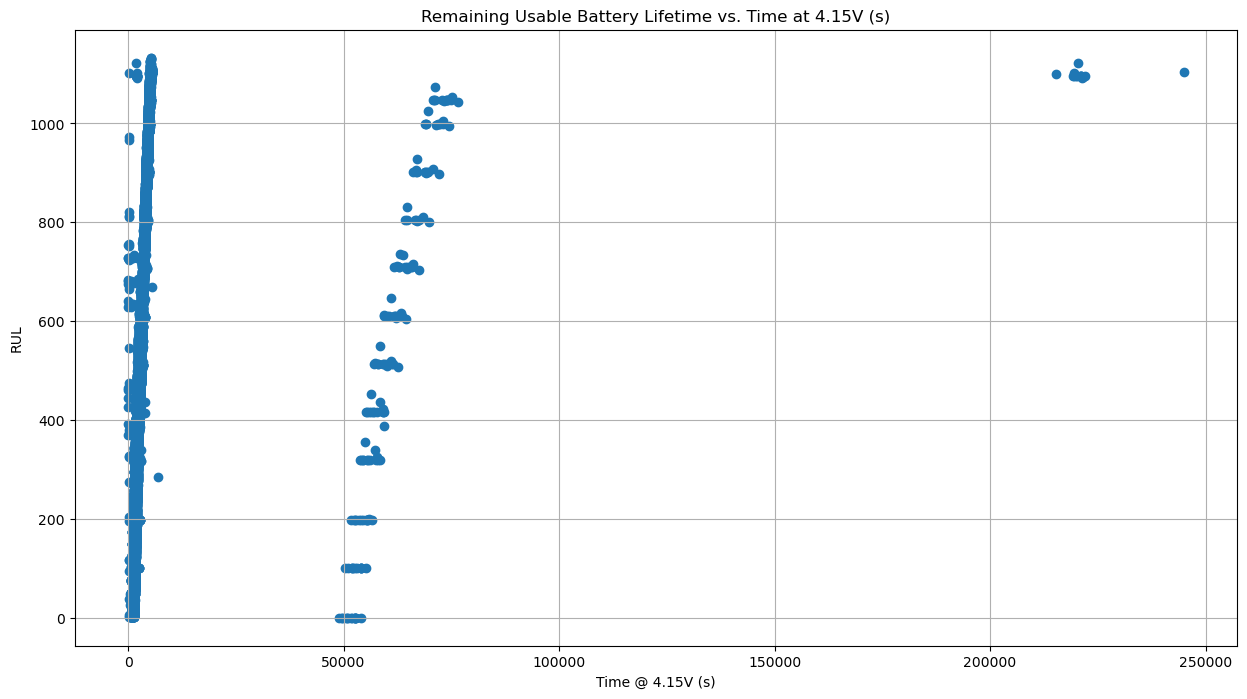

In [94]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Time at 4.15V (s)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Time at 4.15V (s)')
plt.ylabel('RUL')
plt.xlabel('Time @ 4.15V (s)')
plt.grid(True)
plt.show()

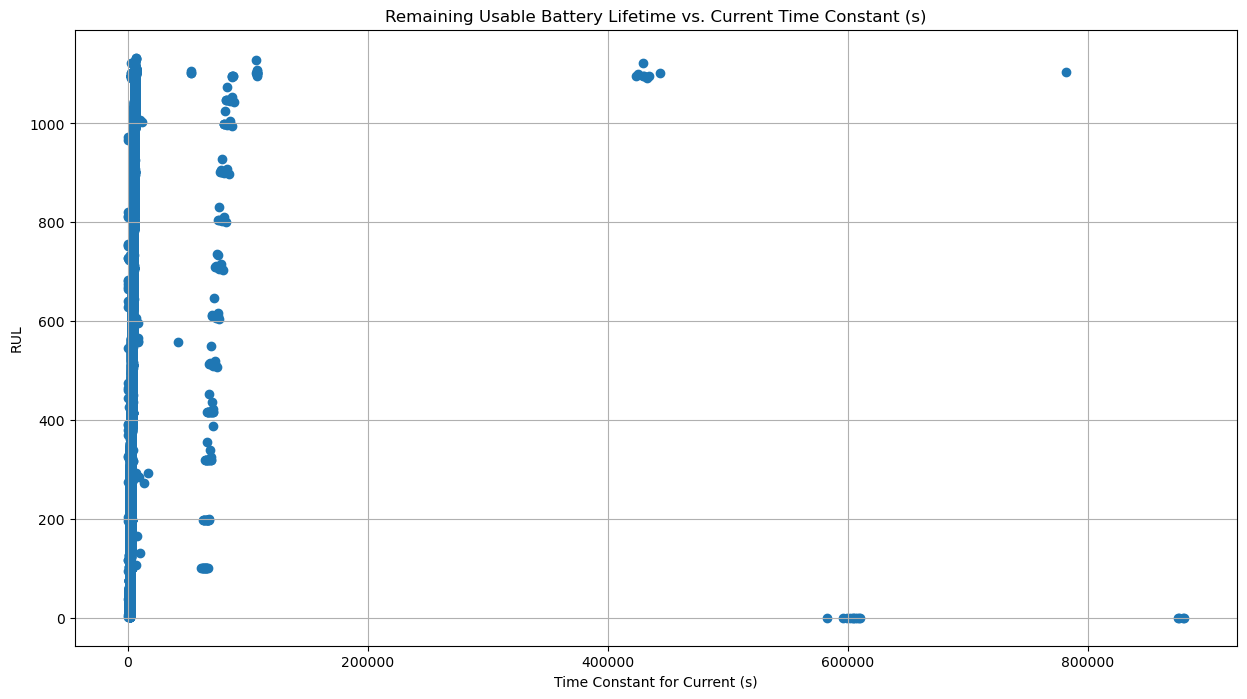

In [96]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Time constant current (s)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Current Time Constant (s)')
plt.ylabel('RUL')
plt.xlabel('Time Constant for Current (s)')
plt.grid(True)
plt.show()

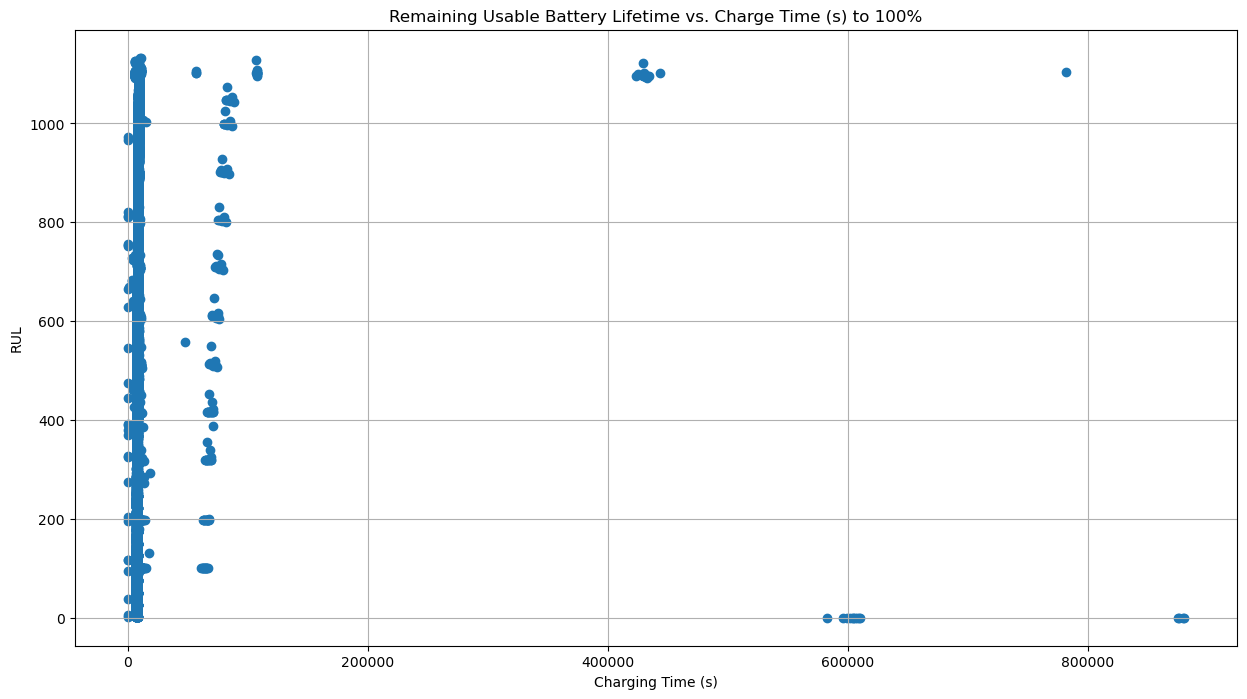

In [98]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Charging time (s)'], df['RUL'])
plt.title('Remaining Usable Battery Lifetime vs. Charge Time (s) to 100%')
plt.ylabel('RUL')
plt.xlabel('Charging Time (s)')
plt.grid(True)
plt.show()

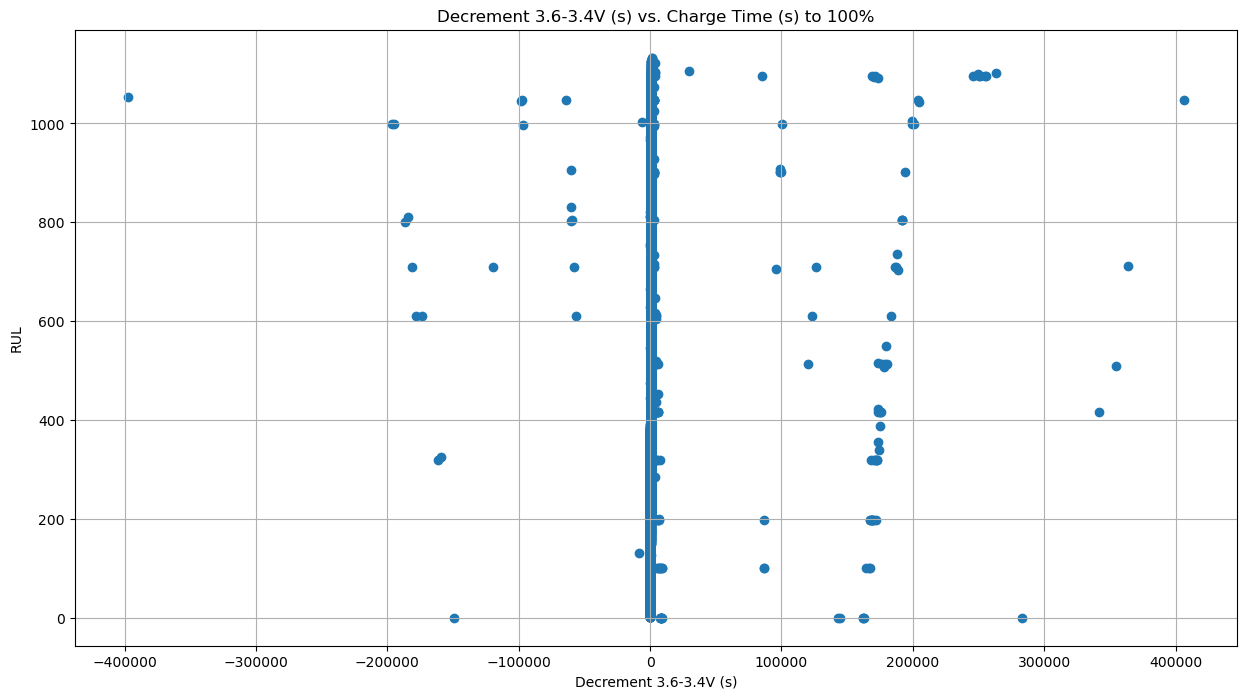

In [100]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Decrement 3.6-3.4V (s)'], df['RUL'])
plt.title('Decrement 3.6-3.4V (s) vs. Charge Time (s) to 100%')
plt.ylabel('RUL')
plt.xlabel('Decrement 3.6-3.4V (s)')
plt.grid(True)
plt.show()

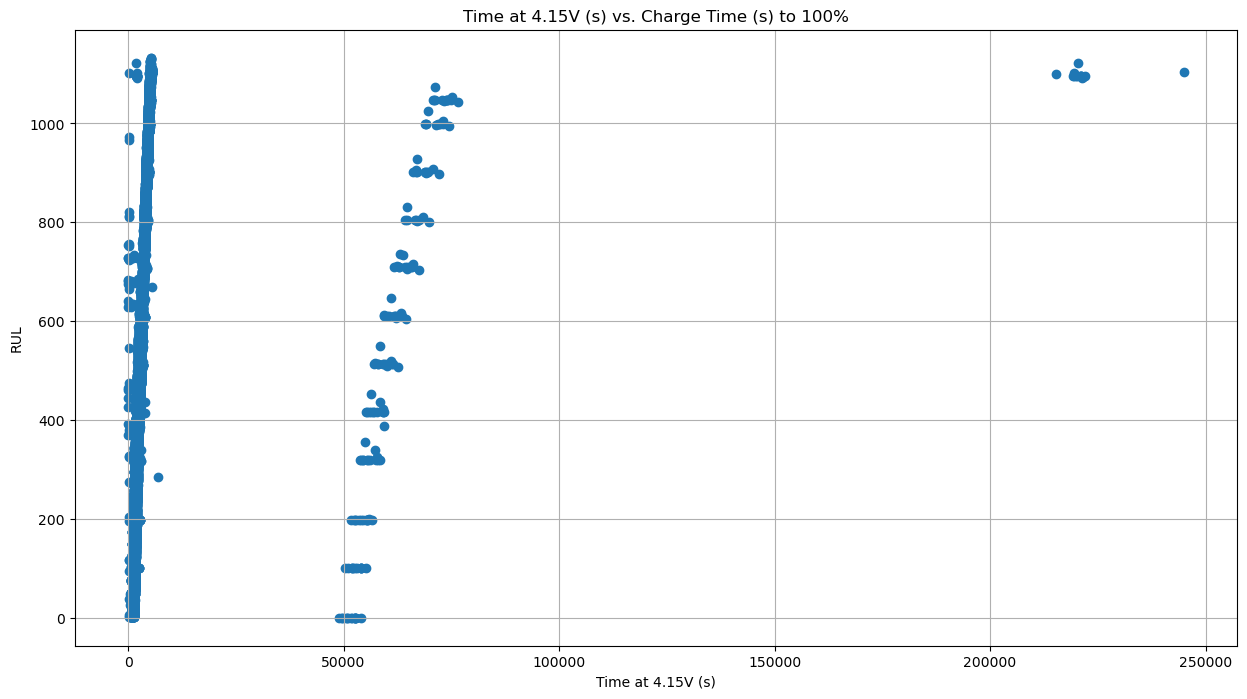

In [102]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
plt.scatter(df['Time at 4.15V (s)'], df['RUL'])
plt.title('Time at 4.15V (s) vs. Charge Time (s) to 100%')
plt.ylabel('RUL')
plt.xlabel('Time at 4.15V (s)')
plt.grid(True)
plt.show()

In [269]:
data = pd.read_csv(file_path)

pred_features = df.drop(['RUL'], axis=1) #Inputs
target = df['RUL'] #RUL output for predic.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [273]:
df.describe()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
count  15064.000000        15064.000000            15064.000000   
mean     556.155005         4581.273960             1239.784672   
std      322.378480        33144.012077            15039.589269   
min        1.000000            8.690000          -397645.908000   
25%      271.000000         1169.310000              319.600000   
50%      560.000000         1557.250000              439.239471   
75%      833.000000         1908.000000              600.000000   
max     1134.000000       958320.370000           406703.768000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
count               15064.000000             15064.000000       15064.000000   
mean                    3.908176                 3.577904        3768.336171   
std                     0.091003                 0.123695        9129.552477   
min                     3.043000                 3.022000        -113.584000   
25%                     3.846000                 3.488000        1828.884179   
50%                     3.906000                 3.574000        2930.203500   
75%                     3.972000                 3.663000        4088.326500   
max                     4.363000                 4.379000      245101.117000   

       Time constant current (s)  Charging time (s)           RUL  
count               15064.000000       15064.000000  15064.000000  
mean                 5461.266970       10066.496204    554.194172  
std                 25155.845202       26415.354121    322.434514  
min                     5.980000           5.980000      0.000000  
25%                  2564.310000        7841.922500    277.000000  
50%                  3824.260000        8320.415000    551.000000  
75%                  5012.350000        8763.282500    839.000000  
max                880728.100000      880728.100000   1133.000000

In [114]:
data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

### Heatplot for Best Predictor of RUL

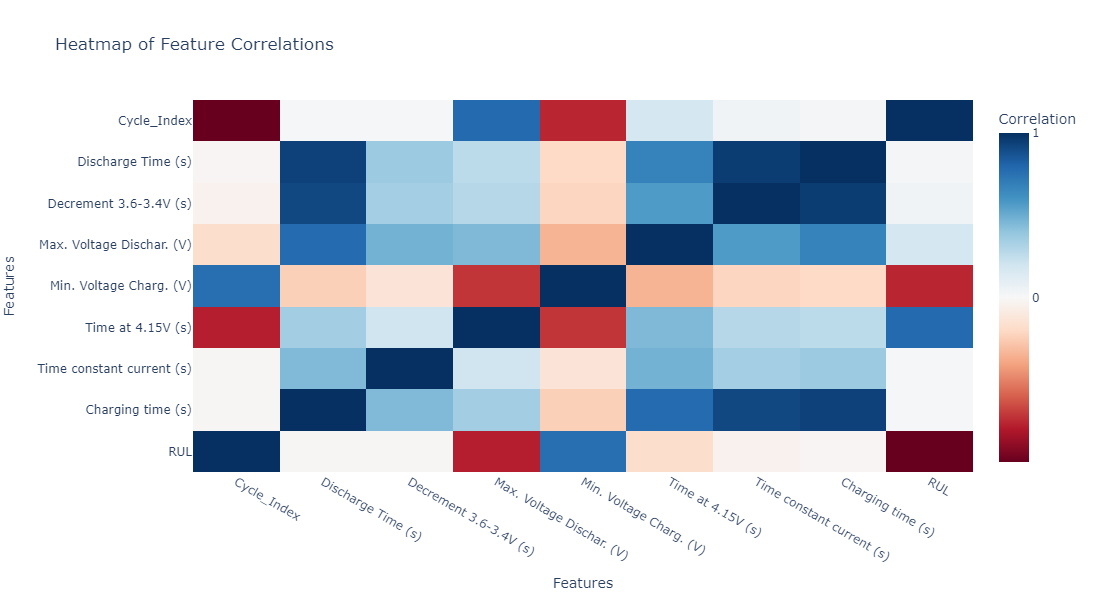

In [116]:
import plotly.graph_objects as go

#columns from file
features = ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
            'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
            'Time at 4.15V (s)', 'Time constant current (s)',
            'Charging time (s)', 'RUL']

features_reversed = features[::-1]

#included vars. in heatmap
selected_features = data[features]

#calc. correlation bw 2 vars.
corr_matrix = selected_features.corr()

#to depict diff. in correlation bw vars.
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  
    x=features, 
    y=features_reversed, 
    colorscale='RdBu', 
    colorbar=dict(title='Correlation', tickvals=[-1, 0, 1], ticktext=['-1', '0', '1'])
))

# Customize layout
fig.update_layout(
    title='Heatmap of Feature Correlations',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=800,  # Adjust width as needed
    height=600,  # Adjust height as needed
)

# Display the plot
fig.show()

### RUL Prediction Model #1: Linear Regression

In [2020]:
#Linear Regression

#Preprocess
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),                       
    ('regressor', LinearRegression())
])

X_train, X_test, Y_train, Y_test = train_test_split(pred_features, target, test_size=0.2, random_state=42)

preprocessing_pipeline.fit(pred_features, target)

Y_pred = preprocessing_pipeline.predict(X_test)

#calc error
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse:.4f}')

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

#predictions based on trained & test data
Y_train_pred = linear_regression.predict(X_train)
Y_test_pred = linear_regression.predict(X_test)

train_acc = linear_regression.score(X_train, Y_train)
print("Accuracy on Training Set: {:.2%}".format(train_acc))

# Calculate and print the R^2 score on the test set
test_acc = linear_regression.score(X_test, Y_test)
print("Accuracy on Test Set: {:.2%}".format(test_acc))

Mean Squared Error: 54.4766
Accuracy on Training Set: 99.95%
Accuracy on Test Set: 99.95%


### RUL Prediction Model #2: Support Vector Regression

In [2038]:
#SVM (Support Vector Regression)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

input = df.drop(columns=['RUL']).values #features
prediction = df['RUL'].values  # prediction RUL

X_train, X_test, y_train, y_test = train_test_split(input, prediction, test_size=0.2, random_state=42)

#Preprocess to standardiz. scale (z-val)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='linear', C=1.0)

svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)

#Correlation & Accuracy
r2 = r2_score(y_test, y_pred)
testcorrelation = f"{r2 * 100:.2f}%"

r2train = r2_score(y_train, y_train_pred)
traincorrelation = f"{r2 * 100:.2f}%"

print("Test Accuracy:", testcorrelation)
print("Train Accuracy: ", traincorrelation)

Test Accuracy: 99.94%
Train Accuracy:  99.94%


### RUL Prediction Model #3: Decision Tree

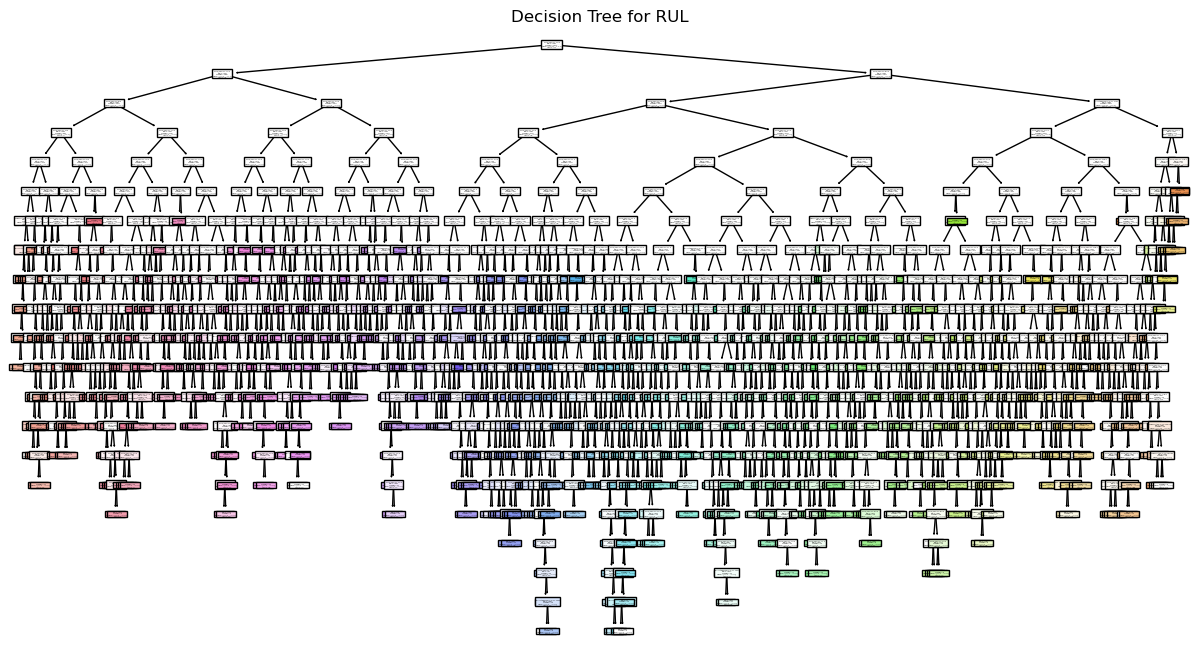

Train Accuracy: 57.28%
Test Accuracy: 54.17%
Mean Squared Error: 60.01228011948224


In [887]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree

decisiontree = DecisionTreeClassifier(
    criterion ='gini',
    splitter ='best',
    max_depth = None,
    min_samples_split = 5,
    min_samples_leaf = 8,
    max_features= None,
    random_state=42,
    class_weight= None
)

decisiontree.fit(X_train, y_train)

#Plot tree
plt.figure(figsize=(15, 8))
plot_tree(decisiontree, filled= True, feature_names = df.columns, class_names =list(map(str, df['RUL'].unique())))
plt.title("Decision Tree for RUL")
plt.show()

#Predict on the test data
y_pred = decisiontree.predict(X_test)
y_train_pred = decisiontree.predict(X_train)

#Accuracy Calc
testaccuracy = accuracy_score(y_test, y_pred)
trainaccuracy = accuracy_score(y_train, y_train_pred)

# Print accuracy
print("Train Accuracy:", f"{trainaccuracy * 100:.2f}%")
print("Test Accuracy:", f"{testaccuracy * 100:.2f}%")

#Print MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

### Fourier Transformation for Time Predictability

In [2069]:
#Fourier Transformation of Voltage Data for better linearity

from scipy.fft import fft, fftfreq

file_including_time = 'HNEI_a_features.csv'
df = pd.read_csv(file_including_time)

X_complex = np.fft.fft(df['Max. Voltage Dischar. (V)'].values)
fourier_X = np.real(X_complex) # remove imaginary/complex num.
fourier_X= fourier_X.reshape(-1, 1)

time = df['Total time (s)'].values
frequency= 1/time
frequency= frequency.reshape(-1, 1)

# Split data into training and testing sets
X_trainF, X_testF, y_trainf, y_testf = train_test_split(fourier_X, frequency, test_size=0.2, random_state=42, train_size= 0.5)

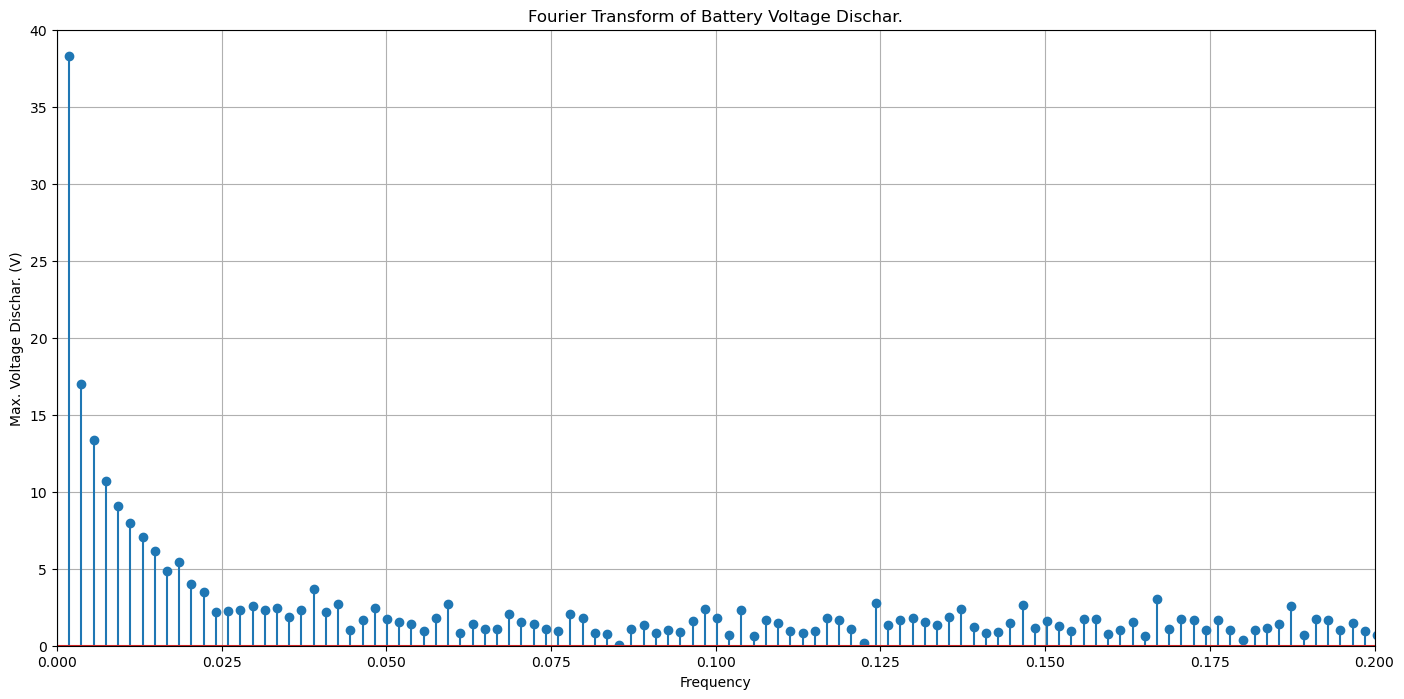

In [2071]:
X = np.fft.rfft(df['Max. Voltage Dischar. (V)'].values)
Y= df['Total time (s)']

# Calculate the frequencies
fs = 1
N= len(X)
freqs = fftfreq(N, 1/fs)

# Plot the FFT result (Magnitude Spectrum)
plt.figure(figsize=(17, 8))
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency')
plt.ylabel('Max. Voltage Dischar. (V)')
plt.title('Fourier Transform of Battery Voltage Dischar.')
plt.xlim(0, fs/5)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

### Time Predictive Model: Fourier Neural Network

In [2106]:
X_complex = np.fft.fft(df[['Max. Voltage Dischar. (V)']].values)
fourier_X = np.real(X_complex) # remove imaginary/complex num.
fourier_X= fourier_X.reshape(-1, 1)

time = df['Total time (s)'].values
frequency= 1/time
frequency= frequency.reshape(-1, 1)

In [2077]:
#Sequential Neural Network

model = Sequential()
model.add(Input(shape= (1,))),
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

loss = tf.keras.losses.Huber(delta= 3.0)
model.compile(optimizer='adam', loss= loss, metrics=['mse'])

model.summary()

model.fit(X_trainF, y_trainf, epochs=50, batch_size=32)

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_399 (Dense)               │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_247 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_400 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_248 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_401 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_249 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_402 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_250 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_403 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,289 (173.00 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6414 - mse: 66.7022
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9492 - mse: 24.0183      
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0514 - mse: 304.2240   
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5271 - mse: 9.4274        
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1447 - mse: 4.3382         
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2396 - mse: 82.0835        
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mse: 0.0863        
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7409 - mse: 39.4733        
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2639 - mse: 8.0735         
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3909 - mse: 11.1723        
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mse: 0.0372        
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [2079]:
y_pred = model.predict(X_testF)

mae = mean_absolute_error(y_testf, y_pred)
mse = mean_squared_error(y_testf, y_pred)
rmse = np.sqrt(mse)

# Print
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Absolute Error (MAE): 0.00265284407400772
Mean Squared Error (MSE): 1.1715389129173954e-05
Root Mean Squared Error (RMSE): 0.0034227750626025593


## Predictions

##### The first prediction (which the models above will be used for) is to predict at which point (both in cycles & time) the RUL of the battery is 0 (where the battery requires charge to continue operation). The standard is whenever the voltage is at its lowest (never reaches 0 due to battery's internal voltage cutoff).

##### The second prediction is to determine battery failure. The standard will be the point at which the Max Voltage Discharge of the battery reaches 0V (essentially, the battery outputs no charge and is beyond repair & future usage). 

#### Linear Regression

In [1436]:
X_pred = linear_regression.predict(X_test)

RUL_pred = X_pred

print(f"RUL is 0 at: {RUL_pred} cycles") #using minimum RUL --> End of Battery Life on 1 charge

RUL is 0 at: [1045.31319023  932.31960538  474.37960825 ...  774.33891586  498.31078124
   30.40779299] cycles


In [1438]:
RUL = np.min(RUL_pred)
RUL= np.abs(RUL)
print(f"RUL 0-Point: {RUL:.2f} cycles")

RUL 0-Point: 19.68 cycles


In [1440]:
RULdiff = df['RUL']

differences = RULdiff.diff().dropna()

average_difference = differences.mean()

print(f"Average RUL consumed per cycle: {average_difference}")

Average RUL consumed per cycle: -1.0344186046511628


In [1442]:
RUL = 19.68
total_cycles = 1113

# RUL consumed per cycle (measured by averaging differences bw RULs in CSV file) --> ABOVE
rul_per_cycle = average_difference

cycle_index = total_cycles - (RUL / rul_per_cycle)

print(f"Battery 0 Charge-Point: After {cycle_index:.2f} cycles")

Battery 0 Charge-Point: After 1132.03 cycles


#### Support Vector Regression Machine*

##### *NOTE: This can be substituted w/ Decision Tree. SVM was chosen here due to higher accuracy.

In [2064]:
input = df[['RUL', 'Max. Voltage Dischar. (V)']].values  # Features
prediction = df['Cycle_Index'].values  # Cycle index where RUL is 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input, prediction, test_size=0.2, random_state=42)

# Predict cycle index where RUL is 0
X_hypo = np.array([[0, 4.15]]) #max volt. value & RUL = 0 for predic. constraints
X_hypo_scaled = scaler.transform(X_hypo)
predicted_cycle_index = svm_model.predict(X_hypo_scaled)

print(f"Battery 0% Charge-Point: After {predicted_cycle_index[0]:.2f} cycles")

Battery 0% Charge-Point: After 1108.10 cycles


### Time Prediction

In [1466]:
#Phase Angle Determination
magnitude = np.abs(fourier_X)
phase_angle = np.angle(fourier_X)
print(f"Phase Angle: {phase_angle}")

Phase Angle: [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [3.14159265]
 [0.        ]
 [0.        ]]


In [1468]:
#Using Fourier formula for time --> (Pi/2 - phase angle)/omega

angular_frequency = 2 * np.pi * frequency
phase_angle = 0 #determined from above

minvolt_time = (np.pi / 2 - phase_angle) / angular_frequency

min_voltage = np.min(magnitude)
min_voltage_index = np.argmin(magnitude)

print(f"Minimum Voltage: {min_voltage:.4f}")
print(f"Index of Minimum Voltage: {min_voltage_index:.2f}")

Minimum Voltage: 0.0040
Index of Minimum Voltage: 1999.00


In [1756]:
cycles = df['Cycle_Index']

# Compute the timestep
timestep = cycles.diff().mean()  # Calculate the average difference between consecutive cycle values

print(f"Average timestep between cycles: {timestep}")

Average timestep between cycles: 1.0344186046511628


In [1994]:
start_time= 14648.45 #seconds from CSV file
time_step= timestep 
time_at_index = start_time + min_voltage_index * time_step

print(f"Est. Battery Lifespan per Charge: {time_at_index:.4f} seconds")

Est. Battery Lifespan per Charge: 16716.2528 seconds


In [2122]:
#Neural Network (Raw Data)

X_trainF = df[['Max. Voltage Dischar. (V)']].values
y_trainf = df['Total time (s)'].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainF)

min_max_voltage = np.min(X_trainF)

model.compile(optimizer='adam', loss='mse')

# Prepare data for prediction (reshape and scale)
X_hypo = np.array([[min_max_voltage]])  # Hypothetical minimum value of Max. Voltage Dischar. (V)
X_hypo_scaled = scaler.transform(X_hypo)

# Predict total time
predicted_total_time = model.predict(X_hypo_scaled)

print(f"Est. Battery Lifespan per Charge: {predicted_total_time[0][0]} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Est. Battery Lifespan per Charge: 14885.125 seconds


### Battery Failure-Point Prediction (Cycles)

In [1380]:
from scipy.optimize import curve_fit

df = pd.read_csv(file_path, nrows=1077)

cycles = df['Cycle_Index']
max_voltage = df['Max. Voltage Dischar. (V)']

# Define the decay function (you can modify this based on your specific data)
def decay_function(x, a, b):
    return a * np.exp(-b * x)

# Extrapolate to find when max voltage becomes 0
def find_zero_voltage_cycle(func, params):
    return np.log(1 / params[0]) / params[1]

predicted_cycle_zero_voltage = np.abs(find_zero_voltage_cycle(decay_function, popt))
print(f'Battery Failure Reached After: {predicted_cycle_zero_voltage:.2f} cycles')

Battery Failure Reached After: 27778.45 cycles


## Conclusion

#### Final Predictions: 

##### Battery Lifespan on ONE Charge: Cycles: **Between 1108.10 & 1132.03 cycles**  |  Time: **Between 14885.13 & 16716.25 secs**
##### Battery Failure Point (AKA: unrepairable from continuous usage): **27,778.45 cycles**
##### True Lifespan on ONE Charge: **10999.07 seconds @ 3.664 V** 


##### Concluding Statement: While the ranges provided are quite large, the upper bounds of the provided ranges represent the battery's performance under ideal conditions, making predictions without a model. On the other hand, the lower bounds are based off predictive regression analysis from both the SVM & Sequential Neural Network. The takeaway from this project is the nuance required in electronic signal analysis. In future analyses, more in-depth & rigorous pre-processing steps could be utilized to clean-up the raw data prior to extensive predictions/modeling.